In [1]:
import datetime
import time
from pandas_datareader import data as pdr
import time
import json
import pickle
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

## Note:
- è giusto che ipos contenga anche la data per essere sicuri. altrimenti potresti prendere giorni precedenti a ipo
- bisogna fare webcrawling per ottenere la lista di tutte le ipo di nasdaq e nyse. Facendo cherry picking di ipos "celebri" a posteriori rischi di selezionare solo quelli che sono andati bene
- sarebbe da fare per vari anni (2021, 2020, 2016 ecc) per valutare varie condizioni di mercato

In [2]:
paths_in=["data/jul2021.pkl",
         "data/jun2021.pkl",
         "data/may2021.pkl",
         "data/apr2021.pkl",
         "data/mar2021.pkl"]

df=pd.DataFrame({})

for path_in in paths_in:
    with open(path_in, 'rb') as f:
        df1 = pickle.load(f)
        df=pd.concat([df,df1])
        
print(len(df))

375


In [3]:
print(df)

    ticker      volume  max-gain  max-loss
0     TNYA   2046073.0      36.8       0.0
1     INAB   1514700.0       2.5      -5.0
2     IMRX    942022.0      21.7      -8.7
3     DOLE   8347916.0       8.8       0.0
4    XPAXU   5449680.0       1.0      -0.4
..     ...         ...       ...       ...
108  DHBCU   8187100.0       1.5      -1.4
109  NDACU   9806200.0       5.7      -1.3
110  OHPAU   9258800.0       8.3      -1.3
111  ARRWU   8613900.0       1.9      -0.8
112  ANZUU  20111200.0       1.0      -0.8

[375 rows x 4 columns]


15.211208735131372 16.360939692766618


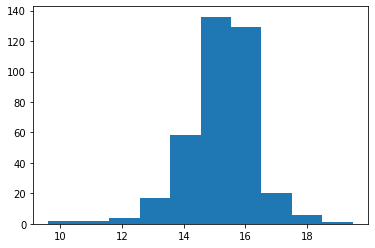

In [24]:
plt.hist(np.log(df["volume"]))
mn=np.mean(np.log(df["volume"]))
pt=np.percentile(np.log(df["volume"]),90)
print(mn,pt)

In [25]:
threshold_gain=7
threshold_vol=pt

dg=df[np.log(df["volume"])>=threshold_vol]

num=len(dg[dg["max-gain"]>=threshold_gain])
den=len(dg)
print(den)
print(num/den)

38
0.7105263157894737


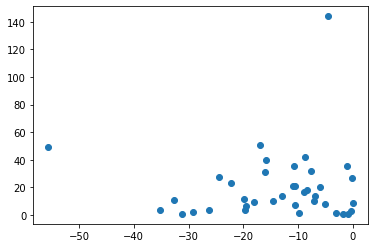

In [26]:
plt.scatter(dg["max-loss"],dg["max-gain"])